## About the data set.

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "Match_three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. Featuring engaging levels, charming characters, and vibrant visuals, the game focuses on casual, fun gameplay designed to retain players through delightful progression and social features.

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

### How does the data look

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. userid - a unique number that identifies each player.<br>
2. version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).<br>
3. sum_gamerounds - the number of game rounds played by the player during the first week after installation<br>
4. retention_1 - did the player come back and play 1 day after installing?<br>
5. retention_7 - did the player come back and play 7 days after installing?<br>

When a player installed the game, they are randomly assigned to either gate_30 or gate_40.

## Importing the data set and basic data exploration


In [90]:
import pandas as pd

file_path = r"C:\Users\Lachu\OneDrive\Documents\Visual Studio 2019\projecct_draft\cookie_cats - cookie_cats.csv.csv"
data = pd.read_csv(file_path)

# Display the first few rows and structure of the data
print(data.head())
print(data.columns)


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')


In [7]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
#checking Dataframe shape (number of rows and columns)

data.shape

(90189, 5)

In [9]:
#Describing numerical values in the data set
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


### Cleaning Data

In [10]:
# checking for NaN values patients

data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## Exploratory Data Analysis

#### Understanding the player distribution 
Here we are finding out more about our data through exploratory data analysis.<br>
1. Finding out the total numer of players in the game.<br>
2. Finding out number of players for each version of the game(for version_30 where gate placed on level 30 and version_40 when gate is moved to level 40)<br>
3. Finding out the number of players who never played the game(sum_gamerounds=0)<br>
4. Finding out the number of players who never came back after day 1/ day 7<br>



In [11]:
#Total number of players for both versions
number_of_players =data['userid'].count()
print(number_of_players)

90189


In [12]:
#Number of players for each version

player_in_version = data.groupby('version')['userid'].size()
print(player_in_version)


version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64


In [13]:
#players who never played any rounds of the game after installing it.

never_played = data[data['sum_gamerounds']==0].count()
print(never_played)

userid            3994
version           3994
sum_gamerounds    3994
retention_1       3994
retention_7       3994
dtype: int64


In [22]:
# Finding out the number of player who never returned to the game

never_returned = data[(data['retention_1'] == False) & (data['retention_7'] == False)]
number_of_never_returned = never_returned.groupby('version').size()
print(number_of_never_returned)

version
gate_30    22840
gate_40    23597
dtype: int64


#### Data Analysis based on player retention
We're trying to find out the retention of players in the game after day 1 and day 7.<br>
1. Finding out the number of players came after day 1 (for version_30 and version_40)<br>
2. Finding out the number of players came after day 7 (for version_30 and version_40)<br>
3. Comparing the retention for both version to find out if the gate placement affects the retention<br>



In [42]:
# Data for version 30 and version 40
version_30 = data[data['version'] == 'gate_30']
version_40 = data[data['version'] == 'gate_40']


#Number of players came back in version_30 and version_40 after day 1


version_30_day1_number = version_30['retention_1'].sum()
version_40_day1_number = version_40['retention_1'].sum()

print("Player's returned for version 30 after day 1:",version_30_day1_number)
print("Player's returned for version_40 after day 1:", version_40_day1_number)

#Number of players came back in version_30 and version_40 after day 7

version_30_day7_number = version_30['retention_7'].sum()
version_40_day7_number = version_40['retention_7'].sum()

print("Player's returned for version 30 after day 7:",version_30_day7_number)
print("Player's returned for version_40 after day 7:", version_40_day7_number)


Player's returned for version 30 after day 1: 20034
Player's returned for version_40 after day 1: 20119
Player's returned for version 30 after day 7: 8502
Player's returned for version_40 after day 7: 8279


In [60]:
#calculating the mean values for both versions for day 1 retention
version_30_day1_mean = version_30['retention_1'].mean()*100
version_40_day1_mean = version_40['retention_1'].mean()*100
print("Mean for version 30 after day 1:",version_30_day1_mean)
print("Mean for version_40 after day 7:", version_40_day1_mean)

#calculating the mean values for both versions for day 7 retention
version_30_day7_mean = version_30['retention_7'].mean()*100
version_40_day7_mean = version_40['retention_7'].mean()*100
print("Mean for version 30 after day 7:",version_30_day7_mean)
print("Mean for version_40 after day 7:", version_40_day7_mean)

Mean for version 30 after day 1: 44.81879194630872
Mean for version_40 after day 7: 44.22827496757458
Mean for version 30 after day 7: 19.020134228187917
Mean for version_40 after day 7: 18.200004396667328


#### Observation:
Looking at the number of players and the mean values for both the version, "version_30" has managed to retain more players by a slight margin. To reach any concrete conclusion, furthur analysis using statistical tools is a good idea.


To compare the retention rates between the two game versions (gate_30 and gate_40) in the Cookie Cats dataset, we can use a "t-test" to check for any statistically significant differences.

In [53]:
import pingouin as pg
#t-test for day1 retention
version30_retention1 = data[data['version'] == 'gate_30']['retention_1'].astype(int)
version40_retention1 = data[data['version'] == 'gate_40']['retention_1'].astype(int)

test_result_retention1= pg.ttest(version30_retention1, version40_retention1, paired=False)
#print test result for day 1
display(test_result_retention1)
p_value_day_1 = test_result_retention1['p-val'].iloc[0]
if (p_value_day_1 < 0.05):
    print(f"The retention rates for day 1 is statistically significant(p-value is {p_value_day_1}")
else:
    print(f"The retention rates for day 1 is NOT statistically significant (p-value is  {p_value_day_1}")

#t-test for day7 retention
version30_retention7 = data[data['version'] == 'gate_30']['retention_7'].astype(int)
version40_retention7 = data[data['version'] == 'gate_40']['retention_7'].astype(int)

test_result_retention7= pg.ttest(version30_retention7, version40_retention7, paired=False)
#print test result for day 7
display(test_result_retention7)
p_value_day_7 = test_result_retention7['p-val'].iloc[0]
if (p_value_day_7 < 0.05):
    print(f"The retention rates for day 7 is statistically significant(p-value is {p_value_day_7}")
else:
    print(f"The retention rates for day 7  is NOT statistically significant (p-value is  {p_value_day_7}")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.784077,90155.112133,two-sided,0.074414,"[-0.0, 0.01]",0.011882,0.037,0.430283


The retention rates for day 1 is NOT statistically significant (p-value is  0.07441443713953834


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.164029,90079.82814,two-sided,0.001557,"[0.0, 0.01]",0.021075,1.12,0.885802


The retention rates for day 7 is statistically significant(p-value is 0.0015565301810066521


### Conclusions from data analysis for retention and following up with a statistical test .<br>
#### Insights from Data analysis for retention
1. Number of players retained after day 1 is higher for version_40 (20119 players)<br>
2. Number of players retaind after day 7 is higher for version_30 (8502 players) <br>
3. Mean value of players returned for version 30 after day 1: 44.81879194630872<br>
4. Mean value of players returned for version_40 after day 7: 44.22827496757458<br>
5. Mean value of players returned for version 30 after day 7: 19.020134228187917<br>
6. Mean value of players returned for version_40 after day 7: 18.200004396667328<br>

The mean value difference between both the versions is very marginal which makes it hard to draw a conclusion only depending on them,
So  t-test is done to examine the p-values of both versions on retentions to understand statistical significance.

#### Statistical test results for both both versions on day 1 retention <br>
1. The retention rates for day 1 is NOT statistically significant (p-value is  0.07441443713953834) <br>
2. The retention rates for day 7 is statistically significant(p-value is 0.0015565301810066521) <br>

Retention rates for day 7 retention is statistically significant, a higher number of players have returned for "version 30" (When the gate placement was in level 30 ) . So this placement appears to retain more users in a long term.


### Visualisation of data analysis for player retention

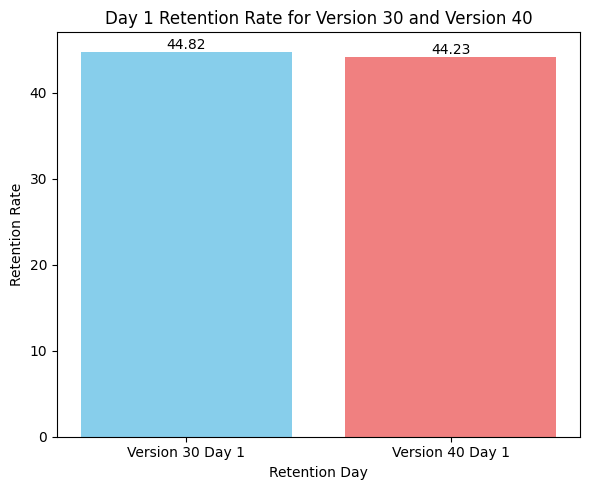

In [71]:

# Bar plot of retention rates

import matplotlib.pyplot as plt


retention_rates = [version_30_day1_mean, version_40_day1_mean]
days = ['Version 30 Day 1', 'Version 40 Day 1']

plt.figure(figsize=(6, 5))  
bars = plt.bar(days, retention_rates, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Day 1 Retention Rate for Version 30 and Version 40")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


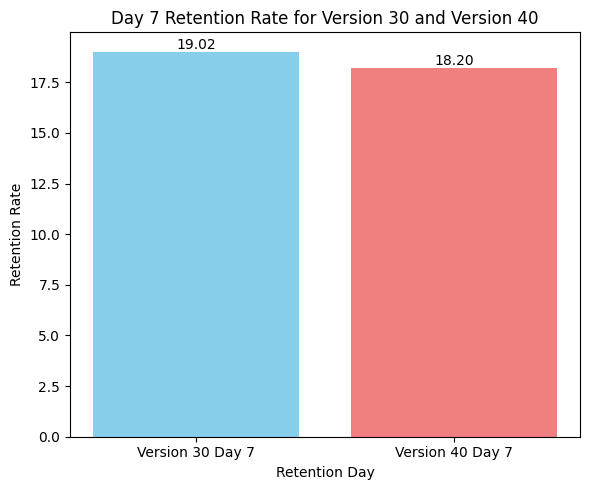

In [70]:
 #Bar plot of retention rates

import matplotlib.pyplot as plt


retention_rates = [version_30_day7_mean, version_40_day7_mean]
days = ['Version 30 Day 7', 'Version 40 Day 7']

plt.figure(figsize=(6, 5))  
bars = plt.bar(days, retention_rates, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Day 7 Retention Rate for Version 30 and Version 40")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}",ha='center', va='bottom', fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()


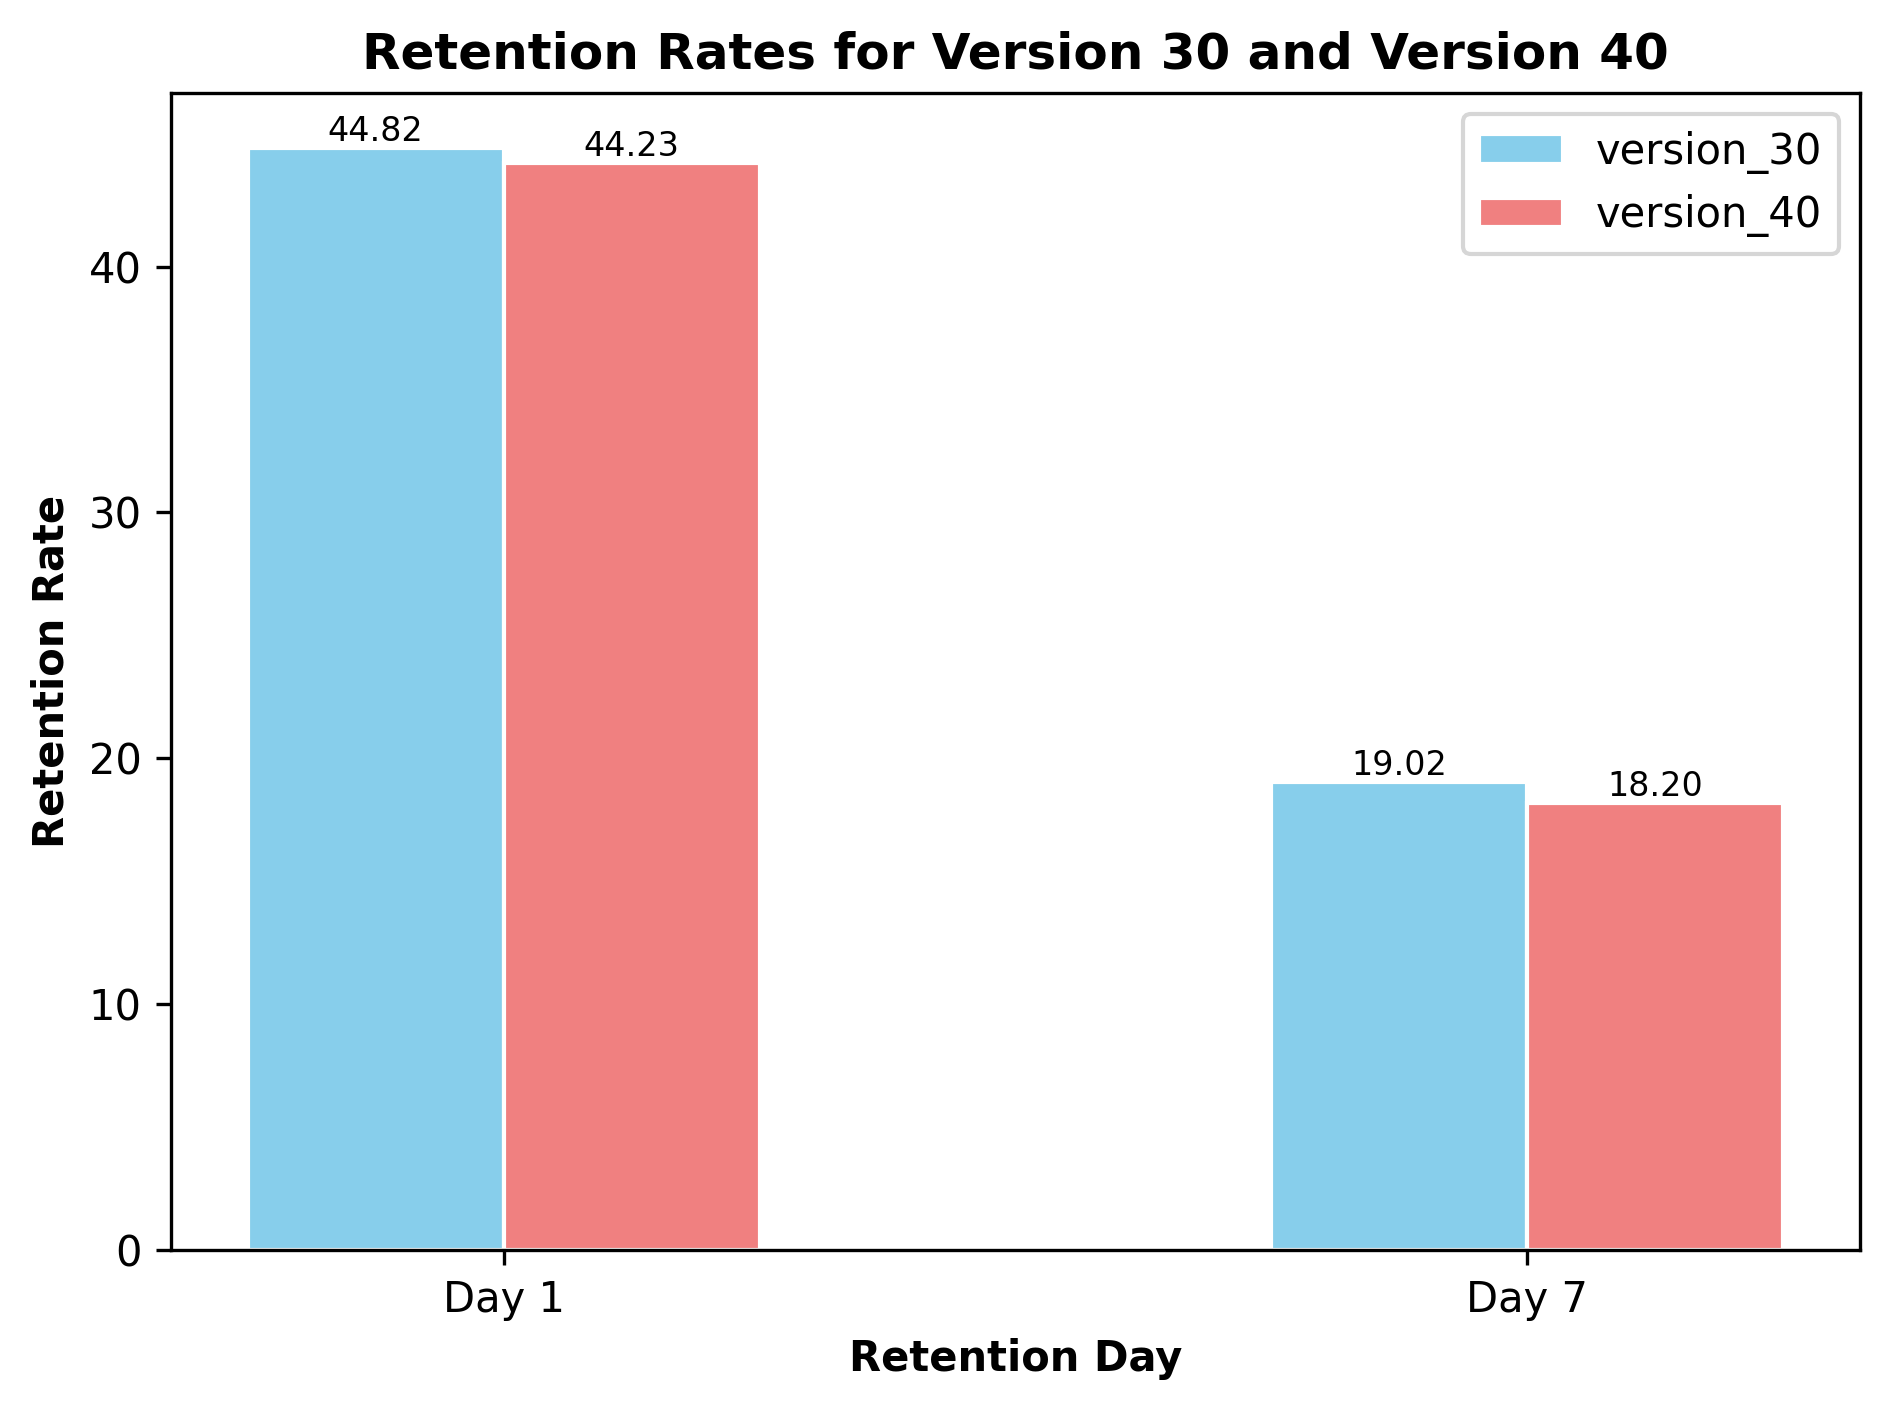

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Data for retention rates
bars1 =[version_30_day1_mean, version_30_day7_mean] 
bars2 =[version_40_day1_mean, version_40_day7_mean]
# Bar width and positions
barWidth = 0.25
r = np.arange(len(bars1)) 
r2 = r + barWidth  
# Plotting
fig, ax = plt.subplots(dpi=300)
ax.bar(r, bars1, color='skyblue', width=barWidth, edgecolor='white', label='version_30')
ax.bar(r2, bars2, color='lightcoral', width=barWidth, edgecolor='white', label='version_40')

# Xticks and labels
ax.set_xlabel('Retention Day', fontweight='bold')
ax.set_ylabel('Retention Rate', fontweight='bold')
ax.set_xticks(r + barWidth / 2)
ax.set_xticklabels(['Day 1', 'Day 7'])
ax.set_title('Retention Rates for Version 30 and Version 40', fontweight='bold')

# Add values to bars
for pos, height in zip(r, bars1):
    ax.text(pos, height, f"{height:.2f}", ha='center', va='bottom', fontsize=8)
for pos, height in zip(r2, bars2):
    ax.text(pos, height, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

# Legend and show
ax.legend()
plt.tight_layout()
plt.show()


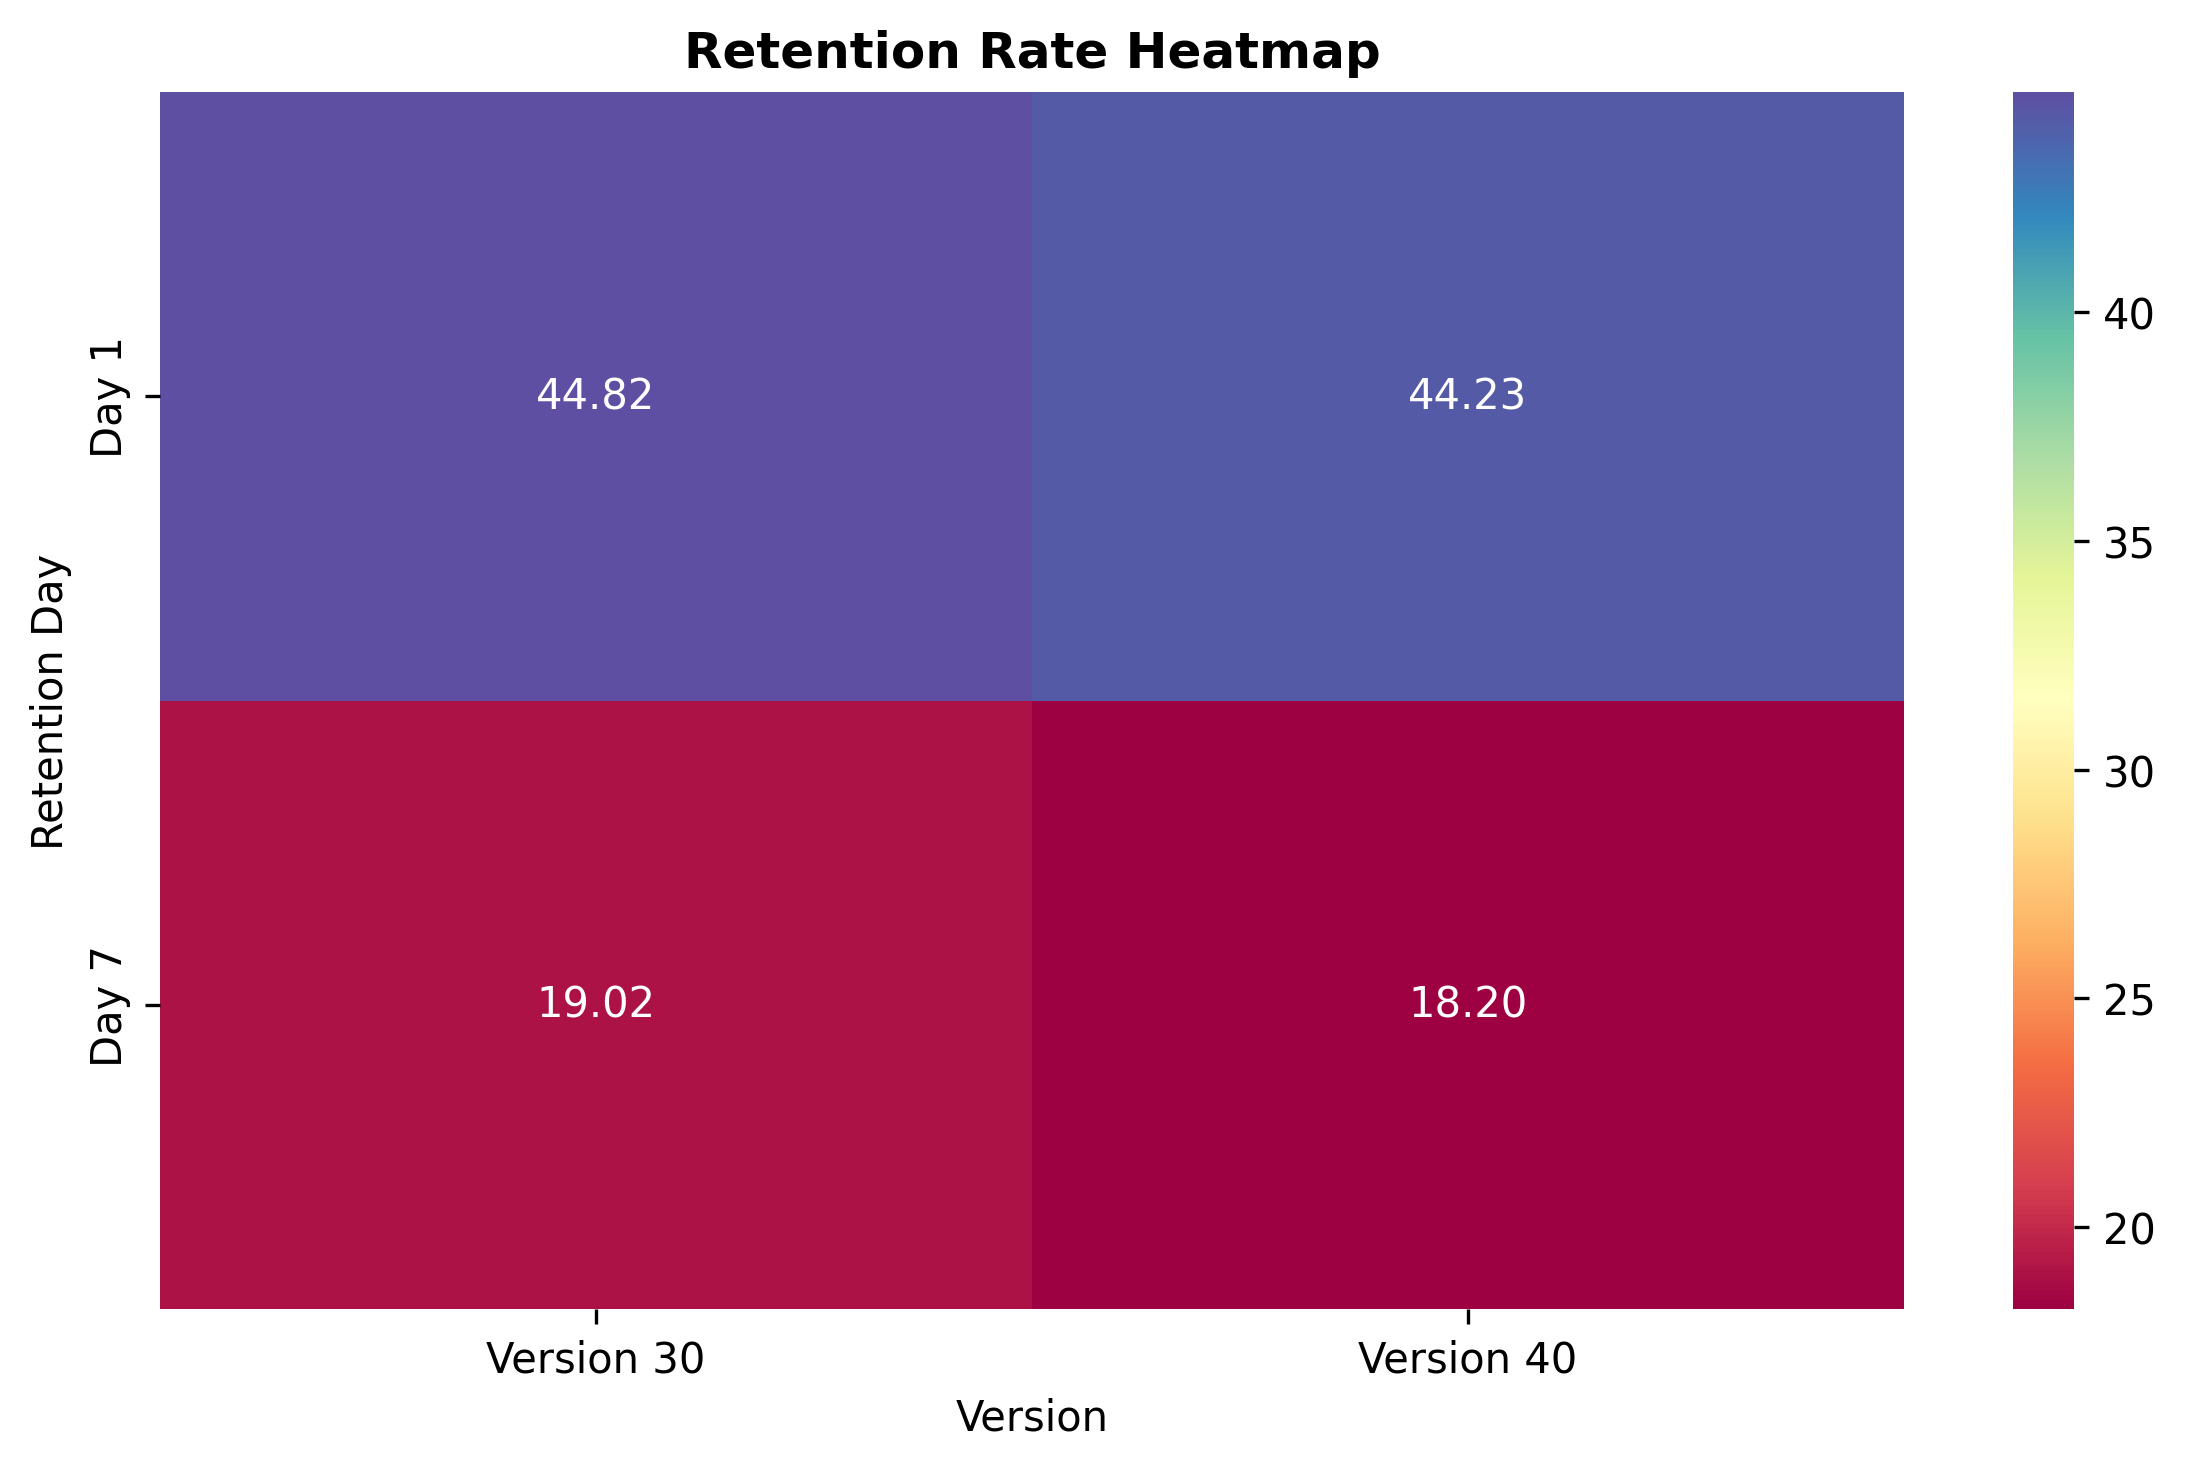

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data
data = np.array([[version_30_day1_mean, version_40_day1_mean] ,[version_30_day7_mean, version_40_day7_mean]])
days = ['Day 1', 'Day 7']
versions = ['Version 30', 'Version 40']

# Plotting
plt.figure(figsize=(8, 5), dpi=300)
sns.heatmap(data, annot=True, cmap="Spectral", xticklabels=versions, yticklabels=days, fmt=".2f")

# Add title
plt.title('Retention Rate Heatmap', fontweight='bold')
plt.xlabel('Version')
plt.ylabel('Retention Day')
plt.tight_layout()
plt.show()


### Analysis based on number of rounds played

The objective is to see if the placement of the gate influences how many rounds players complete before they leave the game.<br>
For doing this analysis , players are categorized based on their level of engagement in the game.<br>
The categorization is done based on the mean and medium values of the "sum_gamrounds".<br>

